In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np
import os 
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')


import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [5]:
# Load dataset
data = pd.read_csv('C:/Users/Imran/OneDrive - Ontario Tech University/Documents/Capstone/pca_df_36.csv')

In [7]:
data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,32,33,34,35
0,0,-0.996949,2.145391,-0.717688,-1.071861,1.494857,-2.723775,-0.591542,0.658355,-0.558988,...,-0.082044,0.002808,-0.077807,-0.069212,0.079276,0.217055,0.271524,-0.175535,-0.319198,0.065546
1,1,2.971142,-0.051852,-1.249479,-2.237045,0.364244,-2.576442,0.767241,0.564430,-0.171339,...,-3.394157,0.427937,-0.303028,-1.359935,-0.260519,0.978168,2.609501,-0.499369,-0.893391,1.501553
2,2,2.098408,-0.327503,-2.183782,4.454325,0.079264,1.109245,-4.239331,5.267327,0.242397,...,0.442129,-0.099232,-0.013115,0.225211,-0.665076,0.303821,0.319271,0.136900,1.970030,1.054321
3,3,3.260567,3.220125,-0.431480,0.298451,0.014607,-0.498471,0.619071,-0.260983,-0.072371,...,0.028783,-0.143363,0.323330,0.076374,1.578280,-0.476056,-0.123911,0.254861,0.101163,1.059550
4,4,-2.200157,-1.824489,-1.056986,2.973353,-0.437934,0.945634,-0.212384,-1.774904,-0.188786,...,-0.124591,0.020120,-0.000350,-0.035897,-0.162371,0.025681,0.048763,-0.212353,-0.589750,1.429907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348054,1348054,2.021439,-1.272542,-2.419236,0.441204,-0.404878,-0.840696,0.426551,0.084755,0.777696,...,0.481948,-0.114163,-0.008160,0.040264,-0.802486,-0.425631,-0.453159,0.164135,2.391912,-0.458395
1348055,1348055,6.964506,-1.785733,0.085923,3.447092,-0.422776,2.041783,1.171845,-1.331302,1.573456,...,0.230575,-0.011027,0.033719,-0.230208,0.054199,-0.085965,0.107679,0.206907,0.568539,-0.445050
1348056,1348056,3.154000,0.350291,-0.675292,-0.317989,-0.205494,-3.893069,4.880742,2.908775,2.710604,...,0.553181,-0.122089,0.161738,0.221485,-1.207058,0.717344,0.577593,0.072434,3.240314,0.015643
1348057,1348057,0.861105,3.268504,0.689920,0.948783,1.546710,1.522628,-2.802041,-3.077628,3.384872,...,1.023636,-0.621997,0.086175,-0.254412,-1.394412,-1.036985,-1.324225,0.254449,0.255921,-0.949406


In [9]:
# pcafr dataset does not have rar column so we will use the rar column of another dataset
dataobj = pd.read_csv('C:/Users/Imran/OneDrive - Ontario Tech University/Documents/Capstone/standardized.csv')

In [10]:
data['target'] = dataobj['rar']

In [11]:
data = data.drop('Unnamed: 0', axis=1)


In [12]:
labels = data['target']

In [13]:
features = data.drop('target', axis=1)

### Creating the individual model

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [21]:
# Define and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

### Creating the hybrid model

In [23]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features)

In [25]:
# Create a DataFrame to hold the features and clusters
data_km = features
data_km['label'] = labels
data_km['cluster'] = clusters

In [27]:
# Function to train Gradient Boosting on a specific cluster
def train_gb_on_cluster(cluster_data):
    features = cluster_data.drop(['label', 'cluster'], axis=1)
    labels = cluster_data['label']
    
    X_train_cluster, X_test_cluster, y_train_cluster, y_test_cluster = train_test_split(features, labels, test_size=0.2, random_state=42)
    
    gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gb_model.fit(X_train_cluster, y_train_cluster)
    
    return gb_model

In [29]:
# Train a Gradient Boosting model for each cluster
gb_models = {}
for cluster in range(3):
    cluster_data = data_km[data_km['cluster'] == cluster]
    gb_models[cluster] = train_gb_on_cluster(cluster_data)

In [30]:
# Assign each sample in the test set to a cluster
test_clusters = kmeans.predict(X_test)

In [31]:
# Initialize an array to hold the predictions
combined_predictions = np.zeros_like(y_test)

In [32]:
# Make predictions using the corresponding model for each cluster
for cluster in range(3):
    cluster_indices = np.where(test_clusters == cluster)[0]
    if len(cluster_indices) > 0:
        X_cluster = X_test.iloc[cluster_indices]  # Use NumPy indexing
        model = gb_models[cluster]
        combined_predictions[cluster_indices] = model.predict(X_cluster).flatten()

# Evaluate the combined performance
combined_mse = mean_squared_error(y_test, combined_predictions)
combined_rmse = np.sqrt(combined_mse)
combined_mae = mean_absolute_error(y_test, combined_predictions)
combined_r2 = r2_score(y_test, combined_predictions)

print(f'Combined Model MSE: {combined_mse}')
print(f'Combined Model RMSE: {combined_rmse}')
print(f'Combined Model MAE: {combined_mae}')
print(f'Combined Model R²: {combined_r2}')

Combined Model MSE: 8379417.8460119795
Combined Model RMSE: 2894.7224126005553
Combined Model MAE: 2179.207807668461
Combined Model R²: 0.9088834880600467


In [33]:
# Evaluate the model
predictions = gb_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print additional metrics
print(f"Single Model MSE: {mse}")
print(f"Single Model RMSE: {rmse}")
print(f"Single Model MAE: {mae}")
print(f"Single Model R²: {r2}")

Single Model MSE: 9635412.262145858
Single Model RMSE: 3104.0960458957866
Single Model MAE: 2328.7442106219255
Single Model R²: 0.895225996296625


In [34]:
#create a dataframe of scores
performance_metrics = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R²'],
    'Single Model': [mse, rmse, mae, r2],
    'Combined Model': [combined_mse, combined_rmse, combined_mae, combined_r2]
})


In [35]:
# Export the performance metrics to a CSV file
performance_metrics.to_csv('performance_metrics_GB_PCA.csv', index=False)

In [36]:
# Get feature importances
importances = gb_model.feature_importances_

# Get the indices that would sort the importances array in descending order
sorted_indices = np.argsort(importances)[::-1]

# Display top 5 feature importance
top_n = 5
for i in range(top_n):
    print(f"Feature {sorted_indices[i]}: Importance {importances[sorted_indices[i]]}")

Feature 0: Importance 0.42305350386742235
Feature 1: Importance 0.2764427346724983
Feature 7: Importance 0.10564668358515732
Feature 4: Importance 0.05261531436482612
Feature 2: Importance 0.05161503365016416


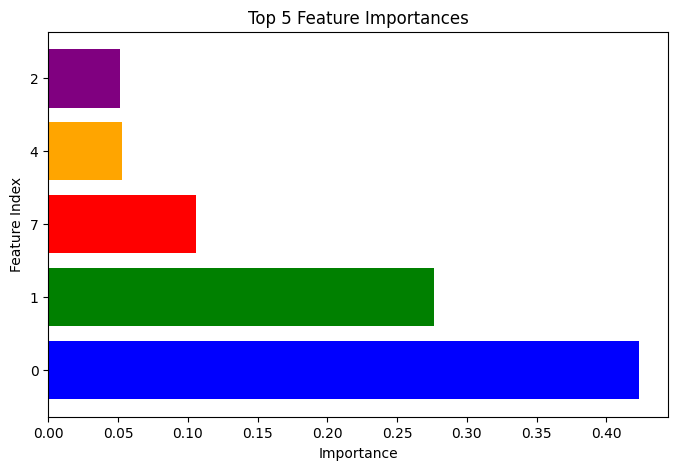

In [37]:
# Define colors for bars
colors = ['blue', 'green', 'red', 'orange', 'purple']

# Plot horizontal bar chart of top 5 feature importances with different colors
top_n = 5
plt.figure(figsize=(8, 5))
plt.barh(range(top_n), importances[sorted_indices][:top_n], align='center', color=colors)
plt.yticks(range(top_n), sorted_indices[:top_n])
plt.xlabel('Importance')
plt.ylabel('Feature Index')
plt.title('Top 5 Feature Importances')
plt.show()

In [38]:
# Get feature importances
importances = model.feature_importances_

# Get the indices that would sort the importances array in descending order
sorted_indices = np.argsort(importances)[::-1]

# Display top 5 feature importance
top_n = 5
for i in range(top_n):
    print(f"Feature {sorted_indices[i]}: Importance {importances[sorted_indices[i]]}")

Feature 1: Importance 0.3885868023653001
Feature 7: Importance 0.21414118316890246
Feature 0: Importance 0.1266065223569711
Feature 4: Importance 0.07517993044938306
Feature 6: Importance 0.056182119263221426


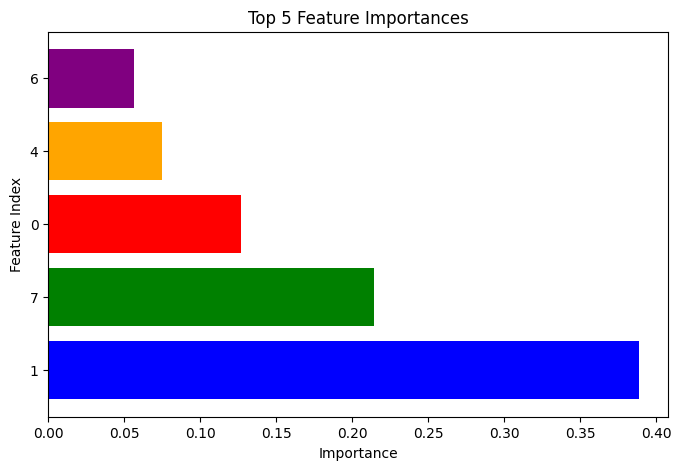

In [39]:
# Define colors for bars
colors = ['blue', 'green', 'red', 'orange', 'purple']

# Plot horizontal bar chart of top 5 feature importances with different colors
top_n = 5
plt.figure(figsize=(8, 5))
plt.barh(range(top_n), importances[sorted_indices][:top_n], align='center', color=colors)
plt.yticks(range(top_n), sorted_indices[:top_n])
plt.xlabel('Importance')
plt.ylabel('Feature Index')
plt.title('Top 5 Feature Importances')
plt.show()